## __Ejercicios Última Clase__

__1)__ Seleccioná un cuento del corpus presentado en el curso y abrilo para trabajar.

__2)__ Tokenizá el cuento y verificá qué elementos son Stopwords. Recordá que NLTK contiene una lista de stopwords precargada. Deberás obtener una lista con las stopwords presentes en el cuento.

__3)__ ¿Considerás que el listado de stopwords es adecuado? 

    a) Si aún hay palabras que considerás que tienen un valor semántico importante, armá una lista con ellas y excluílas de tu lista de sw.
    
    b) Si hay palabras del cuento que quedaron afuera de tu lista de stopwords, pero que vos considerás que deberían formar parte de él, incorporalas a tu lista.
    
    c) Escribí un programa que borre las stopwords y quedate con las palabras semánticamente relevantes.
    
__4)__ De los tokens relevantes, ¿cuáles son los 10 más frecuentes? ¿y cuántas aparecen entre 1 y 3 veces?

__5)__ ¿Cuáles son los lemas más frecuentes? ¿Estás satisfecho con el proceso de lematización que lograste? ¿Por qué?

__6)__ ¿Cuáles son las palabras más representativas de este cuento en relación con los otros? (tf-idf) ¿Coinciden con las palabras de contenido más frecuentes? ¿En qué medida?

__7)__ ¿Cuántos nombres propios aparecen en el texto? Marcalos con alguna etiqueta.

__8)__ ¿Hay algún nombre propio que no esté captando? Si lo hay, agregale la etiqueta.



__9)__ Elegí una frase del texto no muy larga:


    a) Analizala con dos taggers diferentes, y comentá la performance de cada uno de ellos.

    b) Parseala con el parser de Spacy. ¿En qué medida te parece correcto el parseo? 

    c) Formulá una gramática de constituyentes que arroje el parseo que a vos te parece conveniente, usando como modelo la gramática ContextFreeGrammar.cfg vista en clase y probala con el Recursive Descent Parser.

#### Te agradeceríamos si completás esta encuesta acerca del curso: 
           
https://forms.gle/iuCAcuoa3WKBxe11A

__1)__ Seleccioná un cuento del corpus presentado en el curso y abrilo para trabajar.


In [1]:
import os

def get_cuento(cuento):
    
    with open(cuento) as file:
        
        lines = []
        
        for f in file.readlines():
            if f != '\n':
                
                line = f.strip('\n')
                line = line.strip()
                lines.append(line)
                        
    file.close()
                        
    titulo = lines[0]
    cuento = ' '.join(lines[1:])
                        
    return titulo, cuento

corpus_path = os.path.dirname("../bestiario/*")
cuentos = os.listdir(corpus_path)

# elijo el cuento Omnibus
cuento = os.path.join(corpus_path, cuentos[1])

titulo, cuento = get_cuento(cuento)

#print(titulo)
#print(cuento[:1000])


In [25]:
import sys
sys.path.append("/home/dipa/proyectos/2019_cursoNLP/lib/python3.6/site-packages")
import spacy
from spacy import displacy

# cargamos un entrenamiento en español
nlp = spacy.load("es_core_news_sm")



In [26]:
with open('../bestiario/casa_tomada.txt','r') as f:
    casa_tomada = f.read()

In [27]:
doc = nlp(casa_tomada)

__2)__ Tokenizá el cuento y verificá qué elementos son Stopwords. Recordá que NLTK contiene una lista de stopwords precargada. Deberás obtener una lista con las stopwords presentes en el cuento.


In [71]:
import nltk
from nltk.tokenize import RegexpTokenizer

In [72]:
pattern1 = r'\w+'
tokenizer = RegexpTokenizer(pattern1) #instanciamos nuestro regexpTokenizer con el patrón que tenemos arriba

tokens_reg = tokenizer.tokenize(cuento) 
print(tokens_reg)

['Si', 'le', 'viene', 'bien', 'tráigame', 'El', 'Hogar', 'cuando', 'vuelva', 'pidió', 'la', 'señora', 'Robería', 'reclinándose', 'en', 'el', 'sillón', 'para', 'la', 'siesta', 'Clara', 'ordenaba', 'las', 'medicinas', 'en', 'la', 'mesita', 'de', 'ruedas', 'recorría', 'la', 'habitación', 'con', 'una', 'mirada', 'precisa', 'No', 'faltaba', 'nada', 'la', 'niña', 'Matilde', 'se', 'quedaría', 'cuidando', 'a', 'la', 'señora', 'Roberta', 'la', 'mucama', 'estaba', 'al', 'corriente', 'de', 'lo', 'necesario', 'Ahora', 'podía', 'salir', 'con', 'toda', 'la', 'tarde', 'del', 'sábado', 'para', 'ella', 'sola', 'su', 'amiga', 'Ana', 'esperándola', 'para', 'charlar', 'el', 'té', 'dulcísimo', 'a', 'las', 'cinco', 'y', 'media', 'la', 'radio', 'y', 'los', 'chocolates', 'A', 'las', 'dos', 'cuando', 'la', 'ola', 'de', 'los', 'empleados', 'termina', 'de', 'romper', 'en', 'los', 'umbrales', 'de', 'tanta', 'casa', 'Villa', 'del', 'Parque', 'se', 'pone', 'desierta', 'y', 'luminosa', 'Por', 'Tinogasta', 'y', 'Zamu

In [73]:
from nltk import FreqDist 

fdist1 = FreqDist(tokens_reg) 
fdist1

FreqDist({'de': 152, 'la': 125, 'el': 119, 'y': 117, 'en': 75, 'que': 72, 'a': 70, 'se': 64, 'los': 64, 'Clara': 50, ...})

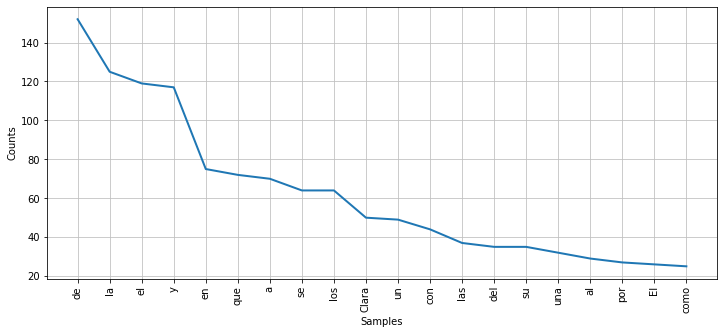

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))  # the size 
fdist1.plot(20, cumulative=False)
plt.show()

In [75]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('spanish'))
stop_words

[nltk_data] Downloading package stopwords to /home/dipa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

c) Escribí un programa que borre las stopwords y quedate con las palabras semánticamente relevantes.

In [76]:
#Eliminación de stopwords

tokens_filtrados = []
tokens_stopwords = []

for t in tokens_reg:
    t = t.lower()
    if t not in stop_words:
        tokens_filtrados.append(t)
    else:
        tokens_stopwords.append(t)


#set(tokens_filtrados)
fdist2 = FreqDist(tokens_stopwords)

cuento_stopwords = set(tokens_stopwords)
print(list(cuento_stopwords)[:50])

print('\n')

fdist3 = FreqDist(tokens_filtrados)
cuento_vocab = set(tokens_filtrados)
print(list(cuento_vocab)[:50])

['fue', 'ni', 'estuvo', 'esas', 'ha', 'él', 'todos', 'tenía', 'otros', 'ante', 'se', 'esos', 'no', 'unos', 'entre', 'nos', 'muy', 'ellas', 'y', 'qué', 'son', 'del', 'les', 'o', 'esté', 'su', 'desde', 'este', 'quien', 'que', 'hasta', 'mí', 'contra', 'sintiendo', 'habían', 'hay', 'tengan', 'habría', 'hubo', 'tuvo', 'pero', 'sí', 'donde', 'le', 'como', 'para', 'sus', 'uno', 'poco', 'yo']


['blanco', 'clara', 'di', 'componiendo', 'vértigo', 'cementerios', 'suelto', 'medicinas', 'chorroarín', 'enderezándose', 'reunirlas', 'gusto', 'encontraba', 'solos', 'hacer', 'criticar', 'fin', 'cada', 'paredón', 'caminaron', 'nueva', 'canteros', 'rojos', 'deteniendo', 'veces', 'distinguirla', 'murmuró', 'curvas', 'caballos', 'devolver', 'explanada', 'trabajo', 'querer', 'gusta', 'examinara', 'va', 'falta', 'callada', 'terror', 'oscuramente', 'diez', 'saltar', 'soltó', 'tráfico', 'prevenir', 'obstinada', 'movido', 'través', 'costaba', 'cordial']


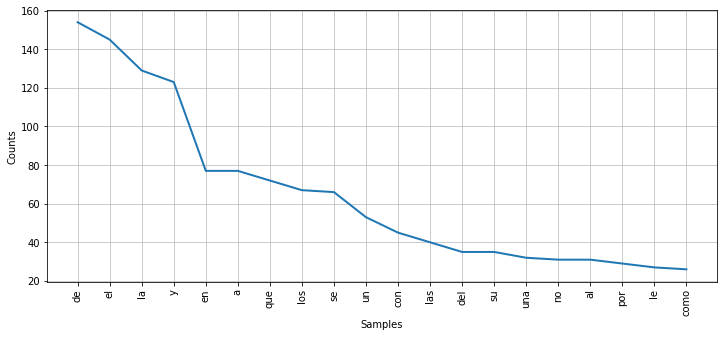

In [77]:
# Stopwords

plt.figure(figsize=(12, 5))  # the size 
fdist2.plot(20, cumulative=False)
plt.show()

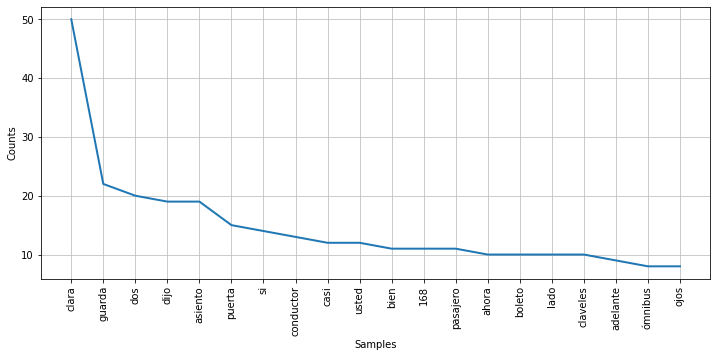

In [78]:
# tokens filtrados s/ stopwords

plt.figure(figsize=(12, 5))  # the size 
fdist3.plot(20, cumulative=False)
plt.show()

In [51]:
# podria refinar mas y agregar a las stopwords los numeros

__4)__ De los tokens relevantes, ¿cuáles son los 10 más frecuentes? ¿y cuántas aparecen entre 1 y 3 veces?


In [79]:
from collections import Counter

# 10 mas frecuentes
c = Counter(tokens_filtrados)
print(len(c)) 
    
mas_comunes = [ t[0] for t in c.most_common(10) ]
print(mas_comunes)

menos_comunes = [ token for token, freq in c.items() if (freq >= 1 and freq <= 3) ]  
print(len(menos_comunes))


1065
['clara', 'guarda', 'dos', 'dijo', 'asiento', 'puerta', 'si', 'conductor', 'casi', 'usted']
974


__5)__ ¿Cuáles son los lemas más frecuentes? ¿Estás satisfecho con el proceso de lematización que lograste? ¿Por qué?

In [80]:

# tokens ya procesados
tokens_helper = ' '.join(tokens_filtrados)
# uso spacy
doc2 = nlp(tokens_helper)
lemma = [token.lemma_ for token in doc2]


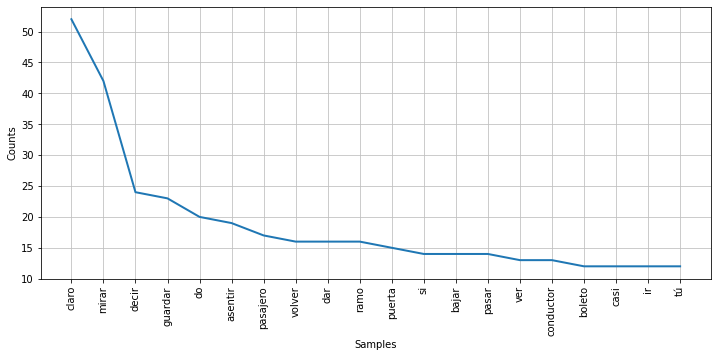

In [81]:
fdist4 = FreqDist(lemma)
plt.figure(figsize=(12, 5))  # the size 
fdist4.plot(20, cumulative=False)
plt.show()

-No estoy conforme con el proceso de lemmatizacion,
-la mayoria de los lemmas son  raices verbales que que no aportan informacion semantica
-terminos que no se que son (i.e "do"), 
-La palabra mas frecuente 'Clara' la paso a masculino perdiendo todo valor explicativo

Clara --> claro

__6)__ ¿Cuáles son las palabras más representativas de este cuento en relación con los otros? (tf-idf) ¿Coinciden con las palabras de contenido más frecuentes? ¿En qué medida?

In [140]:
import herramientas_corpora as hc

In [145]:
tokenizador_palabras = nltk.tokenize.RegexpTokenizer('\w+|\$[\d\.]+|\S+')

corpus = hc.Corpus()
corpus.tokenizador_palabras = tokenizador_palabras
corpus.leer_directorio('../bestiario')

In [146]:
tfidf = corpus.calcular_matriz_tf_idf()

In [158]:
tfidf['/home/dipa/proyectos/2019_cursoNLP/bestiario/omnibus.txt'].sort_values(ascending=False)[:100]

,          2520.000000
.          1810.000000
de         1520.000000
la         1240.000000
el         1190.000000
y          1170.000000
en          740.000000
que         720.000000
a           700.000000
los         640.000000
se          640.000000
un          490.000000
con         440.000000
las         370.000000
del         350.000000
su          350.000000
una         320.000000
al          290.000000
por         270.000000
como        250.000000
no          230.000000
le          220.000000
;           210.000000
El          194.710768
lo          190.000000
para        180.000000
dos         180.000000
más         170.000000
pero        160.000000
casi        120.000000
              ...     
poco         50.000000
así          50.000000
vez          50.000000
entre        50.000000
él           48.664833
—.           48.664833
A            40.000000
porque       40.000000
)            40.000000
mismo        40.000000
uno          37.444378
mejor        30.000000
?          

In [162]:
tfidf.loc[['Clara','guarda', 'dos', 'dijo', 'asiento', 'puerta', 'si', 'conductor', 'casi', 'usted','pasajero'],]

,/home/dipa/proyectos/2019_cursoNLP/bestiario/bestiario.txt,/home/dipa/proyectos/2019_cursoNLP/bestiario/carta_a_una_senorita_en_paris.txt,/home/dipa/proyectos/2019_cursoNLP/bestiario/casa_tomada.txt,/home/dipa/proyectos/2019_cursoNLP/bestiario/cefalea.txt,/home/dipa/proyectos/2019_cursoNLP/bestiario/circe.txt,/home/dipa/proyectos/2019_cursoNLP/bestiario/las_puertas_del_cielo.txt,/home/dipa/proyectos/2019_cursoNLP/bestiario/lejana.txt,/home/dipa/proyectos/2019_cursoNLP/bestiario/omnibus.txt
Clara,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.044917
guarda,0.000000,0.721348,0.000000,0.000000,0.000000,0.000000,0.000000,15.869645
dos,90.000000,50.000000,20.000000,30.000000,80.000000,150.000000,70.000000,180.000000
dijo,27.659361,0.000000,0.000000,0.000000,25.531718,8.510573,2.127643,2.127643
asiento,0.721348,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.705603
puerta,37.444378,14.977751,112.333135,22.466627,44.933254,7.488876,0.000000,97.355384
si,160.000000,80.000000,20.000000,270.000000,230.000000,40.000000,160.000000,110.000000
conductor,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.251679
casi,160.000000,30.000000,40.000000,60.000000,100.000000,80.000000,50.000000,120.000000
usted,1.442695,21.640426,0.000000,0.000000,1.442695,0.000000,0.000000,5.770780


__7)__ ¿Cuántos nombres propios aparecen en el texto? Marcalos con alguna etiqueta

In [120]:
nombres_propios = []

In [121]:
# busco tag 'PROPN' y  label 'PER' con NER de spacy


nombres_pos_tag = [token.text for token in doc if token.pos_ == 'PROPN']
nombres_spacy = [ ent.text for ent in doc.ents if ent.label_ == 'PER']
#print(set(nombres_pos_tag))  
#print(set(nombres_spacy))

In [122]:
# no detecta el nombre clara, el token mas frecuente visto mas arriba


nombres_pos_tag = ['Matilde', 'Roberta', 'Clara', 'Ana']
for name in nombres_pos_tag:
    nombres_propios.append(name)
nombres_spacy = ['Irene', 'Maria Esther']
for name in nombres_spacy:
    nombres_propios.append(name)

print(nombres_propios)

['Matilde', 'Roberta', 'Clara', 'Ana', 'Irene', 'Maria Esther']


In [126]:
# con el taggerNievesBayes filtrando las tags por Sustantivo

import pickle
NaiveBayesTagger = pickle.load(open("NaiveBayesTagger.p", "rb"))
#print("Bayes Classifier", NaiveBayesTagger.tag(tokens_filtrados))

tag_tokens = NaiveBayesTagger.tag(tokens_filtrados)

#tag_tokens
common_nouns = [word for word,pos in tag_tokens if pos == 'NC']



c_nouns = Counter(common_nouns)
#print(len(p_nouns)) 
c_nouns.most_common()  


[('conductor', 9),
 ('puerta', 6),
 ('plaza', 6),
 ('veces', 5),
 ('vez', 5),
 ('paso', 5),
 ('cabeza', 4),
 ('ojos', 4),
 ('vuelta', 4),
 ('gente', 4),
 ('mano', 4),
 ('martín', 3),
 ('cosa', 3),
 ('carrera', 3),
 ('cuerpo', 3),
 ('momento', 3),
 ('emergencia', 2),
 ('palabras', 2),
 ('zona', 2),
 ('coche', 2),
 ('ventanilla', 2),
 ('cuenta', 2),
 ('realidad', 2),
 ('velocidad', 2),
 ('voz', 2),
 ('retiro', 2),
 ('diálogo', 2),
 ('policía', 2),
 ('compañero', 2),
 ('habitación', 1),
 ('radio', 1),
 ('ola', 1),
 ('casa', 1),
 ('juan', 1),
 ('maría', 1),
 ('nubes', 1),
 ('luis', 1),
 ('amigos', 1),
 ('tipo', 1),
 ('cuentas', 1),
 ('dinero', 1),
 ('fondo', 1),
 ('propietario', 1),
 ('trabajo', 1),
 ('distancia', 1),
 ('salto', 1),
 ('señora', 1),
 ('estudio', 1),
 ('impresión', 1),
 ('centímetros', 1),
 ('esfuerzo', 1),
 ('coincidencia', 1),
 ('razón', 1),
 ('inscripción', 1),
 ('seguridad', 1),
 ('color', 1),
 ('masa', 1),
 ('muchachitas', 1),
 ('jóvenes', 1),
 ('cuenca', 1),
 ('hombre'

In [128]:
nombres_bayes_tagger = ['Martin', 'Juan', 'Luis']

for name in nombres_bayes_tagger:
    nombres_propios.append(name)

In [129]:
# faltan encontrar mas y agregarles las etiquetas correspondientes con spacy
nombres_propios

['Matilde',
 'Roberta',
 'Clara',
 'Ana',
 'Irene',
 'Maria Esther',
 'Martin',
 'Juan',
 'Luis']

__9)__ Elegí una frase del texto no muy larga:


    a) Analizala con dos taggers diferentes, y comentá la performance de cada uno de ellos.

    b) Parseala con el parser de Spacy. ¿En qué medida te parece correcto el parseo? 

    c) Formulá una gramática de constituyentes que arroje el parseo que a vos te parece conveniente, usando como modelo la gramática ContextFreeGrammar.cfg vista en clase y probala con el Recursive Descent Parser.

In [132]:
from nltk.tokenize import word_tokenize

sent = 'Si le viene bien, tráigame El Hogar cuando vuelva —pidió la señora Robería, reclinándose en el sillón para la siesta. Clara ordenaba las medicinas en la mesita de ruedas, recorría la habitación con una mirada precisa. No faltaba nada, la niña Matilde se quedaría cuidando a la señora Roberta, la mucama estaba al corriente de lo necesario. Ahora podía salir, con toda la tarde del sábado para ella sola, su amiga Ana esperándola para charlar, el té dulcísimo a las cinco y media, la radio y los chocolates.'
sent_tokenized = word_tokenize(sent)
print(sent_tokenized)

['Si', 'le', 'viene', 'bien', ',', 'tráigame', 'El', 'Hogar', 'cuando', 'vuelva', '—pidió', 'la', 'señora', 'Robería', ',', 'reclinándose', 'en', 'el', 'sillón', 'para', 'la', 'siesta', '.', 'Clara', 'ordenaba', 'las', 'medicinas', 'en', 'la', 'mesita', 'de', 'ruedas', ',', 'recorría', 'la', 'habitación', 'con', 'una', 'mirada', 'precisa', '.', 'No', 'faltaba', 'nada', ',', 'la', 'niña', 'Matilde', 'se', 'quedaría', 'cuidando', 'a', 'la', 'señora', 'Roberta', ',', 'la', 'mucama', 'estaba', 'al', 'corriente', 'de', 'lo', 'necesario', '.', 'Ahora', 'podía', 'salir', ',', 'con', 'toda', 'la', 'tarde', 'del', 'sábado', 'para', 'ella', 'sola', ',', 'su', 'amiga', 'Ana', 'esperándola', 'para', 'charlar', ',', 'el', 'té', 'dulcísimo', 'a', 'las', 'cinco', 'y', 'media', ',', 'la', 'radio', 'y', 'los', 'chocolates', '.']


In [133]:
import pickle

BrillTagger = pickle.load(open("BrillTagger.p", "rb"))
brill_tag_sent = BrillTagger.tag(sent_tokenized)
#brill_tag_sent

In [134]:
#print("Bayes Classifier", NaiveBayesTagger.evaluate([brill_tag_sent]))

Bayes Classifier 0.8415841584158416


In [135]:
bayes_tag_sent =  NaiveBayesTagger.tag(sent_tokenized)

In [136]:
#print("Brill Classifier", BrillTagger.evaluate([bayes_tag_sent]))

Brill Classifier 0.8415841584158416


In [139]:
sent1 = nlp(sent)
options={"distances":1}
displacy.render(sent1, style="dep", options=options, jupyter=True)